In [22]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import os

In [37]:
path = 'data/'
files = [[], []]
samplerates = [[], []]
folder = os.listdir(path)

for piano, syth in zip(os.listdir(path + folder[0]),  os.listdir(path+folder[1])):
    fn = [piano, syth]
    for i in range(2):
        samplerate, file = wavfile.read(path + folder[i] +'/' + fn[i])
        files[i].append(np.array(file, dtype=float).T)
        samplerates[i].append(samplerate)

['piano', 'synthesizer']


In [50]:
data = [[], []]
sec = 4

for k in range(2):
    for f, s in zip(files[k], samplerates[k]):
        for i in range(0, f.shape[-1] - s * sec, s * sec):
            data[k].append(f[:, i:i + s*sec])
        
piano, synth = np.array(data)
input_size = (piano.shape[1], piano.shape[-1])

In [28]:
len(files[0]) / float(samplerates[0])

1775.4472108843538

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

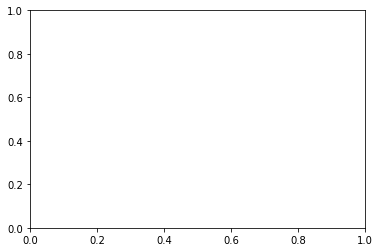

In [26]:
for f, s in zip(files, samplerates):
    times = np.arange(len(f))/float(s)
    
    plt.fill_between(times, f)
    plt.xlim(times[0], times[-1])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.show()